In [ ]:
!pip install efficient-apriori

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from efficient_apriori import apriori

In [ ]:
import pandas as pd

In [ ]:
df=pd.read_csv('1000i(1).csv',names=(['Reciept Number','Food','Quantity']))

In [ ]:
df

,Reciept Number,Food,Quantity
0,1,3,7
1,1,4,15
2,1,2,49
3,1,5,44
4,2,1,1
...,...,...,...
3533,999,5,35
3534,999,2,3
3535,1000,4,15
3536,1000,3,47


In [ ]:
df["Food"].unique()

array([3, 4, 2, 5, 1])

In [ ]:
df["Food"]=df["Food"].map({1:"milk",2:"sugar",3:"Apple",4:"Chocolate",5:"Curd"})

In [ ]:
df

,Reciept Number,Food,Quantity
0,1,Apple,7
1,1,Chocolate,15
2,1,sugar,49
3,1,Curd,44
4,2,milk,1
...,...,...,...
3533,999,Curd,35
3534,999,sugar,3
3535,1000,Chocolate,15
3536,1000,Apple,47


In [ ]:
t=df.groupby(df['Reciept Number'])['Food'].apply(lambda x:list(x))
t

Reciept Number
1                     [Apple, Chocolate, sugar, Curd]
2                                       [milk, sugar]
3                                        [milk, milk]
4                [milk, milk, Curd, Curd, milk, milk]
5           [Chocolate, Chocolate, sugar, Curd, Curd]
                            ...                      
996     [Apple, sugar, Apple, Curd, Apple, Chocolate]
997                   [Apple, Curd, Chocolate, sugar]
998              [milk, Apple, Curd, Chocolate, Curd]
999                              [sugar, Curd, sugar]
1000                        [Chocolate, Apple, Apple]
Name: Food, Length: 1000, dtype: object

In [ ]:
itemsets,rules =apriori(t,min_support=0.15, min_confidence=0.01)

In [ ]:
itemsets

{1: {('Apple',): 507,
  ('Chocolate',): 540,
  ('sugar',): 498,
  ('Curd',): 493,
  ('milk',): 542},
 2: {('Apple', 'Chocolate'): 251,
  ('Apple', 'Curd'): 232,
  ('Apple', 'milk'): 251,
  ('Apple', 'sugar'): 240,
  ('Chocolate', 'Curd'): 264,
  ('Chocolate', 'milk'): 271,
  ('Chocolate', 'sugar'): 258,
  ('Curd', 'milk'): 240,
  ('Curd', 'sugar'): 230,
  ('milk', 'sugar'): 254}}

In [ ]:
rules

[{Chocolate} -> {Apple},
 {Apple} -> {Chocolate},
 {Curd} -> {Apple},
 {Apple} -> {Curd},
 {milk} -> {Apple},
 {Apple} -> {milk},
 {sugar} -> {Apple},
 {Apple} -> {sugar},
 {Curd} -> {Chocolate},
 {Chocolate} -> {Curd},
 {milk} -> {Chocolate},
 {Chocolate} -> {milk},
 {sugar} -> {Chocolate},
 {Chocolate} -> {sugar},
 {milk} -> {Curd},
 {Curd} -> {milk},
 {sugar} -> {Curd},
 {Curd} -> {sugar},
 {sugar} -> {milk},
 {milk} -> {sugar}]

In [ ]:
x=[]
for i in itemsets.keys():
  x.append(pd.Series(itemsets[i]))


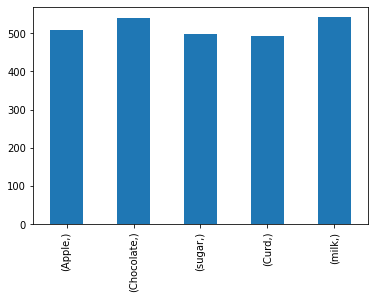

In [ ]:
x[0].plot.bar()